<a href="https://colab.research.google.com/github/CakeNuthep/SVM-From-Scratch/blob/main/SVMFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Creating three types of datasets using make_blobs (docmentation).


1.   Using make_blobs
2.   Using make_moons
3.   Using make_circles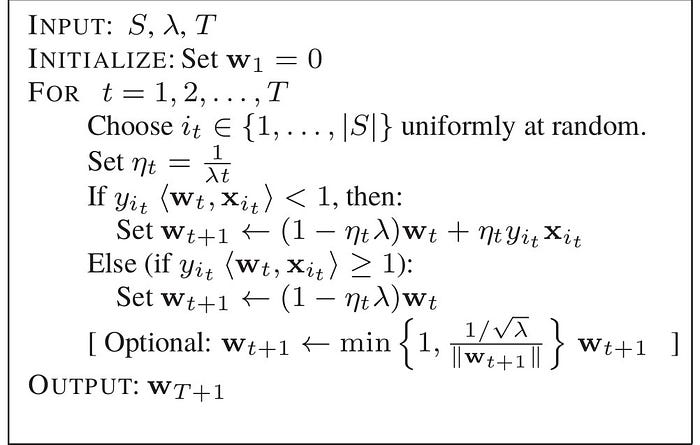

First five rows and col values 
X1 : 
 [[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]  
 y1 :
 [ 1  1  1  1 -1]


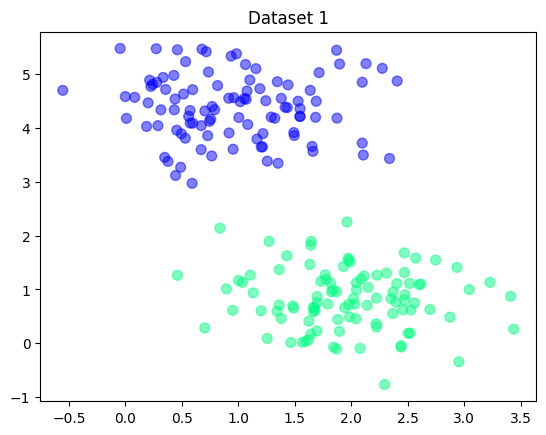

In [2]:
X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X1[:5], " \n y1 :\n",y1[:5])
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 1")
plt.show()

First five rows and col values 
X2 : 
 [[ 0.35753302 -0.15481263]
 [-0.53213755  0.83164442]
 [ 0.38764038  0.90164557]
 [ 1.13404126 -0.48584674]
 [-0.80115083  0.68992034]]  
 y2 :
 [ 1  1  1  1 -1]


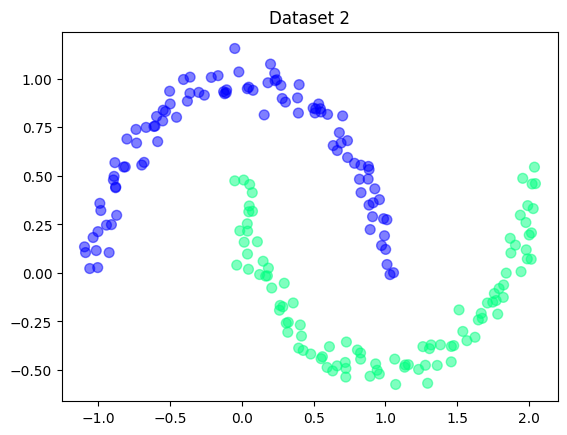

In [3]:
X2, y2 = make_moons(n_samples=200, noise=.05)
y2 = np.where(y2 <= 0, -1, 1)
print("First five rows and col values \nX2 : \n",X2[:5], " \n y2 :\n",y1[:5])
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 2")
plt.show()

First five rows and col values 
X1 : 
 [[-0.28531607 -0.91139399]
 [-0.78679666 -0.66399992]
 [-0.62707723  0.74312899]
 [ 0.10220064  0.49552679]
 [ 0.84091156  0.61869361]]  
 y3 :
 [ 1  1  1  1 -1]


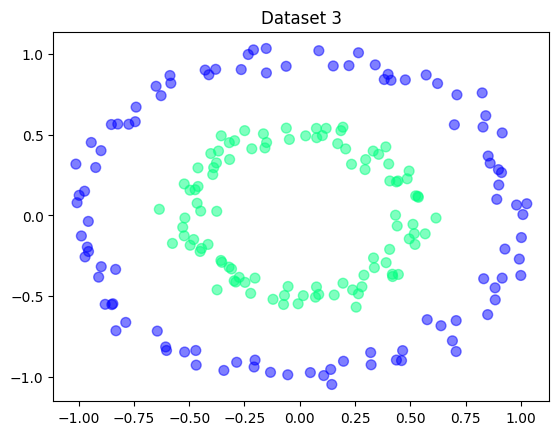

In [4]:
X3, y3 = noisy_circles = make_circles(n_samples=200, factor=.5, noise=.05)
y3 = np.where(y3 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X3[:5], " \n y3 :\n",y1[:5])
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 3")
plt.show()

#Creating SVM models



Without kernals
For a n-dimensional feature, SVM creates an n-1 dimensional hyperplane to seperate the classes. Any hyperplane can be represented as:

wTX -b = 0

For example, if we have a dataset which can be represented by a line, hyperplane would be a point. In our case we have 2 independent and 1 dependent feature. Thus, our hyperplane is a line with the quation:

y = w1X1 + w2X2 - b

where, w = [ w1, w2 ]

We will proceed with the assumption that m1, m2 and b are 0s, and we will update their value in accordane with learning rate.

##Hard margin
If the dataset can be linearly sperated like our first dataset and partially in the second, we can create two parallel hyperplane(lines here) for each classes and contain each data points under these hyperplanes and our goal would be to maximize the distance between these two parallel hyperplane. The region between these two plane is called margin. The equations for both hyperplane is:

wTX -b = -1 and,
wTX -b = 1

The distance between them is 2/||w|| and to maximize the distance, ||w|| should be minimum.

To prevent any data point falling inside margin we add the restriction,

yi(wTXi -b) >= 1

where yi = ith row in the target and Xi = ith row in the X

##Soft margin
If the dataset in non-linearly seprable (dataset 2 and 3, note: if in dataset 1, one or more points are in wrong classes, then it is also non linear), we can use hinge loss for loss function:

max(0, 1-yi(wTXi -b)),

If the datapoint has class = 1, then the loss will be 0, otherwise it will be the distance between the margin and the datapoint.

and our goal is to minimize

Loss = (1/n) Σ max(0, 1-yi(wTXi -b)) + λ||w||2

where λ is a tradeoff between the margin size and xi being on the correct side of margon. If λ is too low, the equation becomes hard margin.

##Updating weights
Let's define by how we are updating weights by differntiating both terms in the loss with wk:

First term:

𝛿max(0, 1-yi(wTXi -b ))/𝛿wk = { 0, if yixiw -b≥1 else -yixi }

Second term:

𝛿(λ||w||2)/𝛿wk = 2λw

If yixiw-b≥1

w = w - α* 2λw

else,

w = w + α* (2λw - yixi)

##Updating intercept
Differentiaite loss by b

First term:

𝛿max(0, 1-yi(wTXi -b ))/𝛿b = { 0, if yixiw -b≥1 else -yi }

Second term:

𝛿(λ||w||2)/𝛿b = 0

If yixiw-b≥1

b = b + α*0

else,

b = b - α* (yi)

##Note:

Slack Variable
Sometimes we have to allow few points to be inside margin. Slack veriable defines how much we can violate the margin which means how many points can be inside the margin.

yi(wTXi -b) >= 1 - ξi




##References:

Support-vector machine, wikipedia
Support Vector Machine — Introduction to Machine Learning Algorithms, Medium.
A Support Vector Machine in just a few Lines of Python Code
Please go through these if have facing any difficuly in understanding the implementation.

In [5]:
class SVM_soft_margin:

    def __init__(self, alpha = 0.001, lambda_ = 0.01, n_iterations = 1000):
        self.alpha = alpha # learning rate
        self.lambda_ = lambda_ # tradeoff
        self.n_iterations = n_iterations # number of iterations
        self.w = None # weights or slopes
        self.b = None # intercept


    def fit(self, X, y):

        n_samples, n_features = X.shape
        self.w = np.zeros(n_features) # initalizing with 0
        self.b = 0 # initializewith 0

        for iteration in range(self.n_iterations):
            for i, Xi in enumerate(X):
                # yixiw-b≥1
                if y[i] * (np.dot(Xi, self.w) - self.b) >= 1 :
                    self.w -= self.alpha * (2 * self.lambda_ * self.w) # w = w + α* (2λw - yixi)
                else:
                    self.w -= self.alpha * (2 * self.lambda_ * self.w - np.dot(Xi, y[i])) # w = w + α* (2λw - yixi)
                    self.b -= self.alpha * y[i] # b = b - α* (yi)
        return self.w, self.b


    def predict(self, X):
        pred = np.dot(X, self.w) - self.b
        result = [1 if val > 0 else -1 for val in pred] # returning in the form of -1 and 1
        return result

In [6]:
def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

In [8]:
def plot_svm(X, y, w, b, title ='Plot for linear SVM'):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.title(title)
    plt.show()

**Note :** I am using accuracy_score as we are dealing with classification problems. r2_score is used for regression analysis (used in the Linear regression notebook)

For dataset 1, score: 1.0


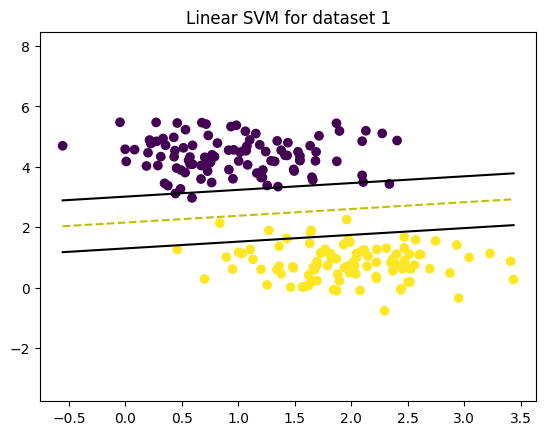

In [9]:
svm1 = SVM_soft_margin()
w1,b1 = svm1.fit(X1,y1)
print("For dataset 1, score:" ,accuracy_score(svm1.predict(X1),y1))
plot_svm(X1, y1, w1, b1, title= 'Linear SVM for dataset 1')

For dataset 2, score: 0.87


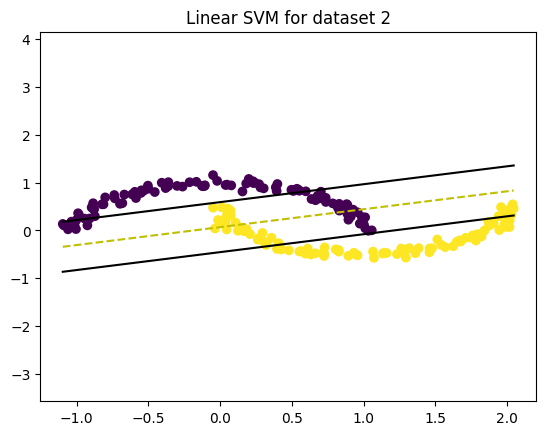

In [10]:
svm2 = SVM_soft_margin()
w2,b2 = svm2.fit(X2,y2)
print("For dataset 2, score:" ,accuracy_score(svm2.predict(X2),y2))
plot_svm(X2, y2, w2, b2, title= 'Linear SVM for dataset 2')

For dataset 3, score: 0.5


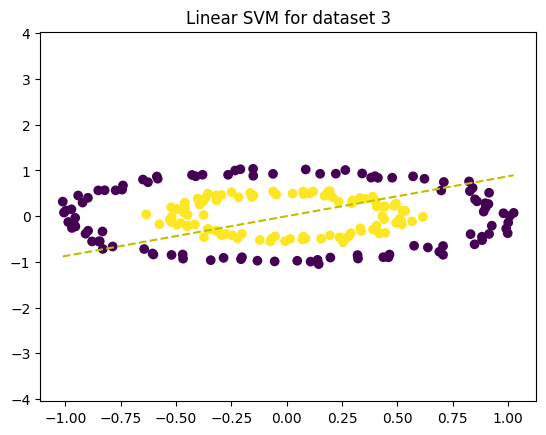

In [11]:
svm3 = SVM_soft_margin()
w3,b3 = svm3.fit(X3,y3)
print("For dataset 3, score:" ,accuracy_score(svm3.predict(X3),y3))
plot_svm(X3, y3, w3, b3, title= 'Linear SVM for dataset 3')

#SVM using PEGASOS and Stochastic Gradient Descent


The above equation shows Pegasos algorithm, which is used with Stochastic Gradient Descent. For implementing Stochastic Gradient Descent, we will append one more feature containing 1 to X and we will remove b. Thus, our equation

y = w1X1 + w2X2 - b

will change to

y = w0X0 + w1X1 + w2X2

but as x0 = 1, thus w0 = -b



##References

svm-from-scratch-step-by-step-in-python

In [12]:
# implementing SVM using Stochastic Gradient Descent and Pegasos algorithms

def SVM_SGD(X,Y,lambda_,epoches):

    X = np.c_[np.ones(X.shape[0]), X] # adding feature containing 1
    w = np.zeros(X.shape[1]) # initializing w with 0s

    # converting arrays to matrix
    X = np.matrix(X)
    Y = np.matrix(Y)
    Y = Y.T
    w = np.matrix(w)

    for t in range(1,epoches+1):

        # choosing random points
        random_pos = random.randrange(0, X.shape[0]-1)
        x = X[random_pos,:]
        y = Y[random_pos,:]

        # computing eta and finding class
        eta = 1/(lambda_*t)
        cls = y * (w*x.T)

        if cls < 1:
            w = (1 - eta*lambda_)*w + eta*y*x
        elif cls >= 1:
            w = (1 - eta*lambda_)*w

    pred = w*X.T
    # converting matrix back to array
    pred = np.array(pred)
    result = [1 if val > 0 else -1 for val in pred[0]] # converting predictions to -1 and 1
    return np.array(w)[0], result

Let's check the algorithm for all 3 datasets

In [13]:
# performance for 1st dataset
w1,result1 = SVM_SGD(X1,y1,lambda_ = 0.01,epoches = 1000)
print("For dataset 1, score: ", accuracy_score(result1,y1))

w2,result2 = SVM_SGD(X2,y2,lambda_ = 0.01,epoches = 1000)
print("For dataset 2, score: ", accuracy_score(result2,y2))

w3,result3 = SVM_SGD(X3,y3,lambda_ = 0.01,epoches = 1000)
print("For dataset 3, score: ", accuracy_score(result3,y3))

For dataset 1, score:  0.995
For dataset 2, score:  0.875
For dataset 3, score:  0.5


#SVM for Non-Linear Dataset using Kernal
To use SVM for Non-Linear dataset, we have to develop a dual SVM. The maths behind it is a bit complicated so please refer the links below in the order:

Support Vector Machines for Beginners – Duality Problem
Support Vector Machines for Beginners – Kernel SVM
Support Vector Machines for Beginners – Training Algorithms
##Loss
The Dual Lagrangian loss function which we are trying to maximize is: **Ldual = ∑αi – (1/2) ∑i ∑j αi αj yi yj K(xi, xj)**
##Gradient
Differentiating the loss wrt αk , using kth term for Gradient Ascent:

**δLdual/δαk = 1 – yk ∑ αj yj K(xj, xk)**

where,

K(xi, xj) is our Kernal function which could be linear, polynomial or gaussian(rbf).

##Updates
α = α + η*(gradient)

where η = learning rate

After training, calculate intercept b:

**b = avgC≤αi≤0{ yi – ∑αjyj K(xj, xi) }**

##Prediction
For α>0 :

**y^ = sign( ∑ αiyi k(xi, xi)+b)**

Polynomial = (c + X.y)degree

Gaussian = e -(1/ σ2) ||X-y|| 2 </sup>

In [14]:
class SVM_Dual:

    def __init__(self, kernel='poly', degree=2, sigma=0.1, epoches=1000, learning_rate= 0.001):
        self.alpha = None
        self.b = 0
        self.degree = degree
        self.c = 1
        self.C = 1
        self.sigma = sigma
        self.epoches = epoches
        self.learning_rate = learning_rate

        if kernel == 'poly':
            self.kernel = self.polynomial_kernal # for polynomial kernal
        elif kernel == 'rbf':
            self.kernel =  self.gaussian_kernal # for guassian

    def polynomial_kernal(self,X,Z):
        return (self.c + X.dot(Z.T))**self.degree #(c + X.y)^degree

    def gaussian_kernal(self, X,Z):
        return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(X[:, np.newaxis] - Z[np.newaxis, :], axis=2) ** 2) #e ^-(1/ σ2) ||X-y|| ^2

    def train(self,X,y):
        self.X = X
        self.y = y
        self.alpha = np.random.random(X.shape[0])
        self.b = 0
        self.ones = np.ones(X.shape[0])

        y_mul_kernal = np.outer(y, y) * self.kernel(X, X) # yi yj K(xi, xj)

        for i in range(self.epoches):
            gradient = self.ones - y_mul_kernal.dot(self.alpha) # 1 – yk ∑ αj yj K(xj, xk)

            self.alpha += self.learning_rate * gradient # α = α + η*(1 – yk ∑ αj yj K(xj, xk)) to maximize
            self.alpha[self.alpha > self.C] = self.C # 0<α<C
            self.alpha[self.alpha < 0] = 0 # 0<α<C

            loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_mul_kernal) # ∑αi – (1/2) ∑i ∑j αi αj yi yj K(xi, xj)

        alpha_index = np.where((self.alpha) > 0 & (self.alpha < self.C))[0]

        # for intercept b, we will only consider α which are 0<α<C
        b_list = []
        for index in alpha_index:
            b_list.append(y[index] - (self.alpha * y).dot(self.kernel(X, X[index])))

        self.b = np.mean(b_list) # avgC≤αi≤0{ yi – ∑αjyj K(xj, xi) }

    def predict(self, X):
        return np.sign(self.decision_function(X))

    def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)

    def decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

    # https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
    def plot(self, title='Plot for non linear SVM'):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap='winter', alpha=.5)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx = np.linspace(xlim[0], xlim[1], 50)
        yy = np.linspace(ylim[0], ylim[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.decision_function(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[-1, 0, 1],linestyles=['--', '-', '--'])
        plt.title(title)
        plt.show()

Accuracy:  1.0


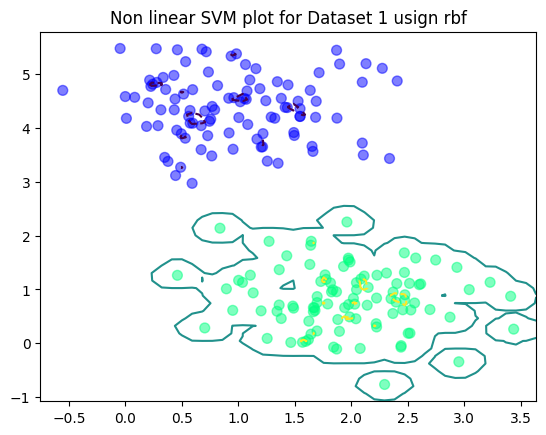

In [15]:
#dataset 1, using gaussian
svm_dual1 = SVM_Dual(kernel = 'rbf')
svm_dual1.train(X1,y1)
print("Accuracy: ", svm_dual1.score(X1,y1))
svm_dual1.plot('Non linear SVM plot for Dataset 1 usign rbf')

Accuracy:  1.0


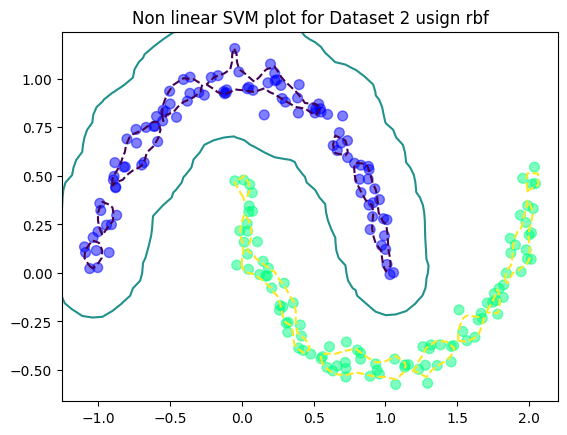

In [16]:
#dataset 2, using gaussian
svm_dual2 = SVM_Dual(kernel = 'rbf')
svm_dual2.train(X2,y2)
print("Accuracy: ", svm_dual2.score(X2,y2))
svm_dual2.plot('Non linear SVM plot for Dataset 2 usign rbf')

1.0


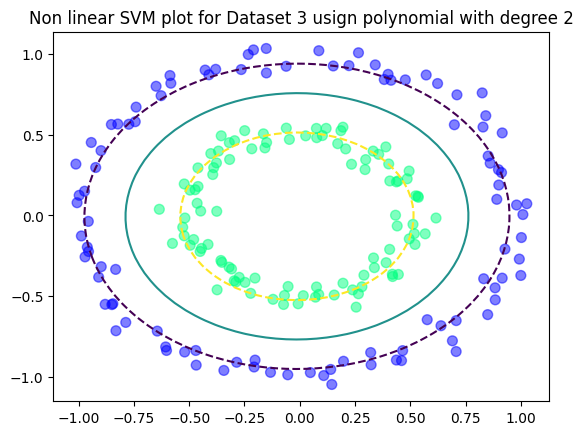

In [17]:
# using polynomial with degree 2, because its circular
svm_dual3 = SVM_Dual(kernel='poly', degree=2)
svm_dual3.train(X3,y3)
print(svm_dual3.score(X3,y3))
svm_dual3.plot('Non linear SVM plot for Dataset 3 usign polynomial with degree 2')

#Working with the pre-defined SVM Library

In [18]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

# defining a function to plot decision boundary according to the svm model
def plot(X, y, svm, title='SVM plot'):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()

Test accuracy 1.0
Train accuracy 1.0


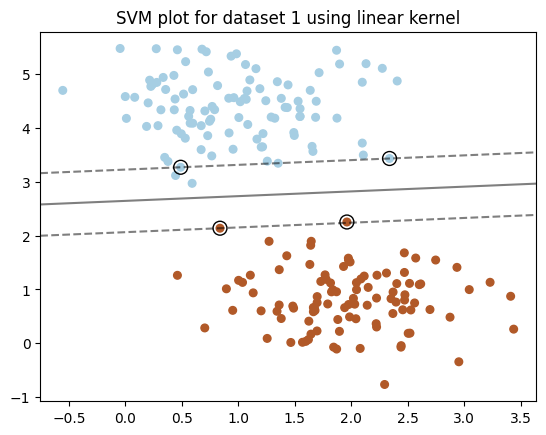

In [19]:
# for dataset 1
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=0) # creating testing and training set

svm1 = SVC(kernel='linear') # using linear kernal as our margin is a line
svm1.fit(X_train, y_train) # training the model

# accurcy print
print("Test accuracy", accuracy_score(svm1.predict(X_test), y_test))
print("Train accuracy", accuracy_score(svm1.predict(X_train), y_train))

plot(X1, y1, svm1, title='SVM plot for dataset 1 using linear kernel')

Test accuracy 1.0
Train accuracy 1.0


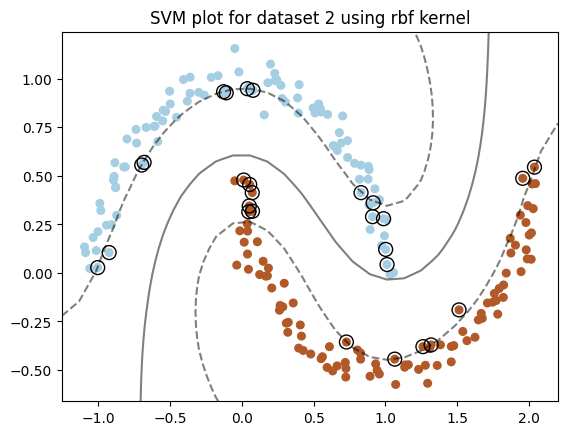

In [20]:
# for dataset 2
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=0) # creating testing and training set

svm2 = SVC(kernel='rbf')  # using rbf kernal as our margin is non linear
svm2.fit(X_train, y_train) # training the model

# accurcy print
print("Test accuracy", accuracy_score(svm2.predict(X_test), y_test))
print("Train accuracy", accuracy_score(svm2.predict(X_train), y_train))
plot(X2, y2, svm2, title='SVM plot for dataset 2 using rbf kernel')

Test accuracy 1.0
Train accuracy 1.0


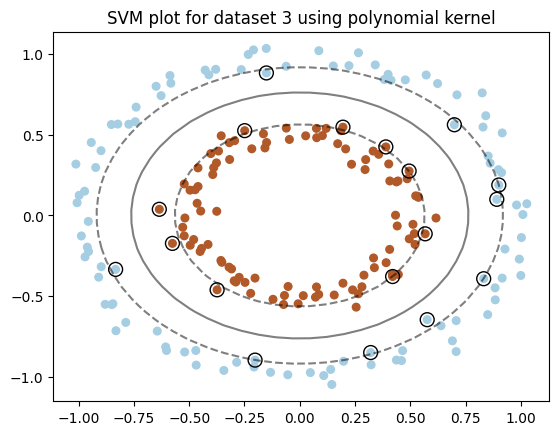

In [21]:
# for dataset 3
X_train, X_test, y_train, y_test = train_test_split(X3, y3, random_state=0) # creating testing and training set

svm3 = SVC(kernel='poly', degree=2) # using poly with degree 2 as our margin is circular
svm3.fit(X_train, y_train)  # training the model

# accurcy print
print("Test accuracy", accuracy_score(svm3.predict(X_test), y_test))
print("Train accuracy", accuracy_score(svm3.predict(X_train), y_train))
plot(X3, y3, svm3, title='SVM plot for dataset 3 using polynomial kernel')